# Synthetic Data Generation with Builder
This notebook demonstrates how to use the Builder class to generate synthetic datasets with known causal structures for causal discovery experiments

## Setup

First, we import necessary libraries and the `Builder` class:

In [1]:
import sys
import os
sys.path.append(os.path.abspath('..')) 

In [ ]:
from src.generation.builder import Builder
import math
import networkx as nx

## Initialization
We initialize a `Builder` object with the following parameters:

- **observations**: 250 observations per dataset
- **n_variables_exo**: 2 exogenous variables
- **n_variables_endo**: 4 endogenous variables
- **functions_to_use**: Various functional relationships between variables
  - Linear relationships
  - Polynomial relationships
  - Sigmoid transformations
  - Nonlinear functions (sine, hyperbolic tangent)
  - Interaction effects between variables
- **functions_kwargs**: Specific parameters for the functions
  - Polynomial degrees: [1,2] and [2,3]
  - Nonlinear functions: sine and hyperbolic tangent
- **datasets_per_function**: 40 datasets generated per function type
- **noise_std**: 0.2 standard deviation of noise added
- **seed**: 123 for reproducibility


In [3]:
builder = Builder(
    observations=250,  # number of observations per dataset
    n_variables_exo=2,  # number of exogenous variables
    n_variables_endo=4,  # number of endogenous variables
    functions_to_use=[
            "linear",
            "polynomial",
            "sigmoid",
            "nonlinear",
            "interaction",
        ],  # functions to generate the data
    functions_kwargs={
        "polynomial": [[1, 2], [2, 3]],  # arguments for the functions
        'nonlinear': [math.sin, math.tanh],
    },  # arguments for the functions
    datasets_per_function=40,  # number of datasets to generate per function
    noise_std=0.2,  # standard deviation of noise
    seed=123  # seed for reproducibility
)

## Actual Data Generation

The `build()` method generates:
1. Random Directed Acyclic Graphs (DAGs) representing causal relationships
2. Synthetic data following these causal structures
3. Different types of functional relationships between variables

In [4]:
# Step 2: Generate the datasets and DAGs
builder.build()

Generating data for linear function...
Generating data for sigmoid function...
Generating data for interaction function...
Generating data for poly_deg_1_2 function...
Generating data for poly_deg_2_3 function...
Generating data for nonlinear_sin function...
Generating data for nonlinear_tanh function...


## Data Inspection
We can inspect the generated data and visualize the causal graphs:

In [5]:
# we can check one of the generated dataset
builder.get_generated_observations()['linear'][0]

,X0,X1,X2,X3,U0,U1
0,0.020819,1.043068,0.025157,0.051161,0.802728,0.015378
1,0.968659,2.916887,1.170497,2.380378,0.656361,0.715508
2,0.667150,2.150179,0.806163,1.639451,0.565654,0.492796
3,0.562136,1.478570,0.679267,1.381390,0.208623,0.415227
4,0.614698,1.876554,0.742781,1.510554,0.437061,0.454052
...,...,...,...,...,...,...
245,0.334608,0.769738,0.404330,0.822265,0.035397,0.247161
246,0.722138,1.831680,0.872608,1.774578,0.213514,0.533413
247,0.312252,0.768659,0.377315,0.767326,0.073535,0.230647
248,0.135349,0.766270,0.163552,0.332606,0.380252,0.099977


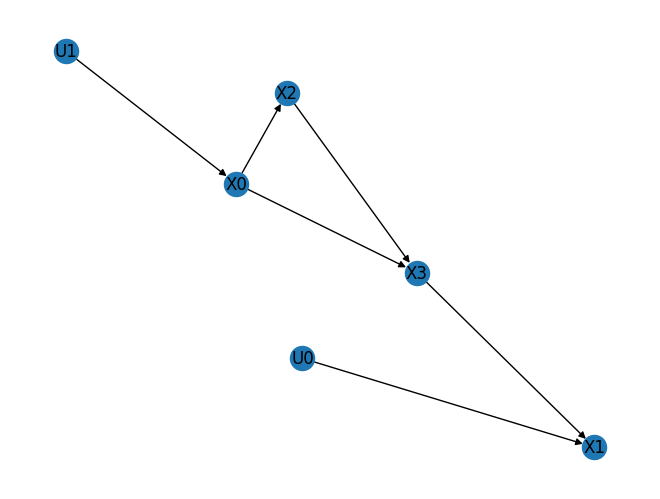

In [ ]:
# we can check one of the generated dags
dag = builder.get_generated_dags()['linear'][0]
nx.draw(dag, with_labels=True)

## Saving the results

We save all data and the corresponding DAGs to Pickle

In [9]:
builder.to_pickle('../data/example/synthetic_data.pkl')